# Modelo Completo

Como anexo a la práctica, voy a intentar construir el modelo completo de red neuronal. Usando variables sintéticas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as randint
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.optimizers import Nadam
from keras.layers import Dropout
#from imblearn.under_sampling import NearMiss

import tensorflow as tf

tf.Session(config=tf.ConfigProto(intra_op_parallelism_threads=4))
%matplotlib inline


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Cargamos los datos:

In [2]:



datos_path = "./"
clientes_file = "Clientes_train.csv"
zonas_file = "Zonas.csv"

clientes = pd.read_csv(os.path.join(datos_path, clientes_file), sep='\t')
zonas = pd.read_csv(os.path.join(datos_path, zonas_file), sep='\t')

datos = pd.merge(clientes, zonas, on="ID_Zona", how="inner")



clientes_file_2 = "Clientes_test.csv"


clientes2 = pd.read_csv(os.path.join(datos_path, clientes_file_2), sep='\t')
zonas = pd.read_csv(os.path.join(datos_path, zonas_file), sep='\t')

datos2 = pd.merge(clientes2, zonas, on="ID_Zona", how="inner")

#targets2 = datos2["Seguro_Vivienda"]
#variables2 = datos2.drop(["Seguro_Vivienda"], axis=1, inplace=False)



X_test_2 = datos2._get_numeric_data()

In [3]:
datos.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.0,617.55,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3
1,C3441,01/05/1962,26/12/1984,Hombre,Z1143,0,0,0,0.0,0.00,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3
2,C0412,19/01/1967,29/04/1987,Hombre,Z1143,0,0,1,0.0,0.00,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3
3,C3565,20/04/1948,06/09/1969,Hombre,Z1143,0,1,0,0.0,3315.54,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3
4,C0315,28/07/1979,18/06/2001,Mujer,Z1143,0,1,2,0.0,2561.45,...,28.17,21.01,27.13,71.34,28.66,32.77,67.23,2.23,1.47,96.3


In [4]:
datos2.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
0,C2172,05/10/1981,04/02/2005,Hombre,Z0403,1,2,2,735.14,2535.49,...,41.42,0.00,0.00,33.04,66.96,78.78,21.22,0.0,0.0,100.00
1,C3005,05/04/1974,26/11/1995,Hombre,Z0403,0,0,1,0.00,0.00,...,41.42,0.00,0.00,33.04,66.96,78.78,21.22,0.0,0.0,100.00
2,C1627,21/09/1983,27/12/2004,Mujer,Z0700,0,1,1,0.00,3195.94,...,46.35,16.59,1.30,0.00,100.00,31.24,68.76,0.0,0.0,100.00
3,C3120,16/02/1986,24/09/2007,Mujer,Z0700,0,3,0,0.00,4610.12,...,46.35,16.59,1.30,0.00,100.00,31.24,68.76,0.0,0.0,100.00
4,C0649,24/01/1945,02/12/1967,Hombre,Z1023,0,0,0,0.00,0.00,...,21.16,19.46,41.63,17.29,82.71,17.86,82.14,0.0,8.9,91.11


In [6]:
targets = datos["Seguro_Vivienda"]
variables = datos.drop(["Seguro_Vivienda"], axis=1, inplace=False)

## Estudio de datos

Hacemos un estudio de los datos. Empezamos por una inspección visual de una muestra de filas de la tabla:

In [7]:
targets.describe()

count      2927
unique        2
top       False
freq       2762
Name: Seguro_Vivienda, dtype: object

In [8]:
variables.describe()

,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,...,Poblacion_Funcionario,Poblacion_Trabajador_Cualificado,Poblacion_Trabajador_No_Cualificado,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,...,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,0.080287,0.750940,1.066279,37.133915,1583.312689,273.471145,47.392026,34.010779,18.597458,14.136502,...,29.345565,22.355572,26.771343,54.007017,45.992983,27.863485,72.136515,1.449713,6.700150,91.850126
std,0.365148,0.795887,1.001220,289.125502,2008.636888,741.281246,24.955844,20.001426,20.498031,18.661422,...,21.739949,20.322406,21.439939,37.375465,37.375465,24.390093,24.390093,5.362351,12.187754,14.078293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.410000,19.980000,0.000000,0.000000,...,15.230000,3.880000,9.420000,14.900000,8.175000,7.275000,56.530000,0.000000,0.000000,90.120000
50%,0.000000,1.000000,1.000000,0.000000,649.610000,117.630000,48.180000,32.140000,14.350000,6.440000,...,27.480000,19.550000,22.220000,58.410000,41.590000,20.570000,79.430000,0.000000,0.000000,99.990000
75%,0.000000,1.000000,2.000000,0.000000,2948.910000,303.705000,65.450000,44.705000,30.530000,20.700000,...,41.150000,33.700000,41.020000,91.825000,85.100000,43.470000,92.725000,0.000000,8.325000,100.000000
max,4.000000,10.000000,7.000000,4934.590000,16735.670000,17188.620000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.010000


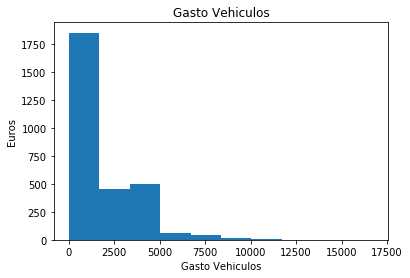

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(datos["Gasto_Vehiculos"], bins = 10, range = (datos["Gasto_Vehiculos"].min(), datos["Gasto_Vehiculos"].max()))
plt.title("Gasto Vehiculos")
plt.xlabel("Gasto Vehiculos")
plt.ylabel("Euros")
plt.show()

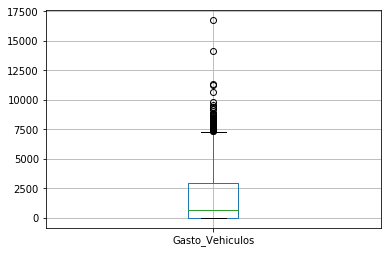

In [10]:
variables.boxplot(column="Gasto_Vehiculos")
plt.show()

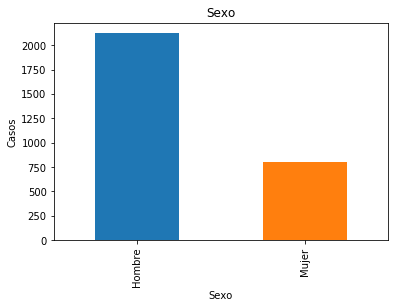

In [11]:
ax = variables["Sexo"].value_counts().plot(kind="bar")
plt.title("Sexo")
plt.xlabel("Sexo")
plt.ylabel("Casos")
plt.show()

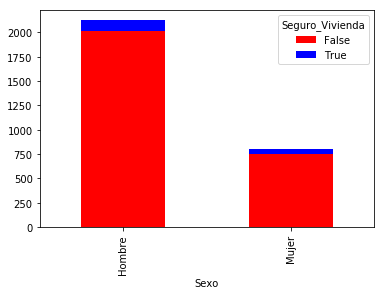

In [12]:
tmp = pd.crosstab([datos.Sexo], datos.Seguro_Vivienda)
tmp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

# Modelo


Creamos variables sintéticas para ámbas tablas: Edad (años) y Antiguedad (meses):

In [13]:

datos['Edad'] = ((pd.to_datetime("06/10/2018", format='%d/%m/%Y') - pd.to_datetime(datos.Fecha_Nacimiento, format='%d/%m/%Y')) 
          /np.timedelta64(1, 'Y')).astype(int)

datos['Antiguedad'] = ((pd.to_datetime("06/10/2018", format='%d/%m/%Y') - pd.to_datetime(datos.Fecha_Alta, format='%d/%m/%Y')) 
          /np.timedelta64(1, 'M')).astype(int)

datos['Sexo_2'] = 0
datos['Sexo_2'][datos.Sexo=='Hombre'] =1


datos2['Edad'] = ((pd.to_datetime("06/10/2018", format='%d/%m/%Y') - pd.to_datetime(datos.Fecha_Nacimiento, format='%d/%m/%Y')) 
          /np.timedelta64(1, 'Y')).astype(int)

datos2['Antiguedad'] = ((pd.to_datetime("06/10/2018", format='%d/%m/%Y') - pd.to_datetime(datos.Fecha_Alta, format='%d/%m/%Y')) 
          /np.timedelta64(1, 'M')).astype(int)

datos2['Sexo_2'] = 0
datos2['Sexo_2'][datos2.Sexo=='Hombre'] =1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:

datos.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,...,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000,Edad,Antiguedad,Sexo_2
0,C3088,29/03/1968,27/03/1989,Mujer,Z1143,0,1,0,0.0,617.55,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,50,354,0
1,C3441,01/05/1962,26/12/1984,Hombre,Z1143,0,0,0,0.0,0.00,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,56,405,1
2,C0412,19/01/1967,29/04/1987,Hombre,Z1143,0,0,1,0.0,0.00,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,51,377,1
3,C3565,20/04/1948,06/09/1969,Hombre,Z1143,0,1,0,0.0,3315.54,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,70,588,1
4,C0315,28/07/1979,18/06/2001,Mujer,Z1143,0,1,2,0.0,2561.45,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,39,207,0


In [15]:
datos2.head()

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,...,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000,Edad,Antiguedad,Sexo_2
0,C2172,05/10/1981,04/02/2005,Hombre,Z0403,1,2,2,735.14,2535.49,...,33.04,66.96,78.78,21.22,0.0,0.0,100.00,50,354,1
1,C3005,05/04/1974,26/11/1995,Hombre,Z0403,0,0,1,0.00,0.00,...,33.04,66.96,78.78,21.22,0.0,0.0,100.00,56,405,1
2,C1627,21/09/1983,27/12/2004,Mujer,Z0700,0,1,1,0.00,3195.94,...,0.00,100.00,31.24,68.76,0.0,0.0,100.00,51,377,0
3,C3120,16/02/1986,24/09/2007,Mujer,Z0700,0,3,0,0.00,4610.12,...,0.00,100.00,31.24,68.76,0.0,0.0,100.00,70,588,0
4,C0649,24/01/1945,02/12/1967,Hombre,Z1023,0,0,0,0.00,0.00,...,17.29,82.71,17.86,82.14,0.0,8.9,91.11,39,207,1


Preparamos la tabla para entrenar

### Remuestreo

In [16]:
datos_ext = datos

for i in range(0,3):
    datos_ext = datos_ext.append(datos_ext[datos_ext.Seguro_Vivienda==1])

datos_ext[datos_ext.Seguro_Vivienda==1]
#datos_ext

,ID_Cliente,Fecha_Nacimiento,Fecha_Alta,Sexo,ID_Zona,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,...,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000,Edad,Antiguedad,Sexo_2
11,C1947,10/09/1948,08/09/1973,Hombre,Z1201,1,0,2,492.21,3890.19,...,92.04,7.96,43.84,56.16,0.00,3.38,96.62,70,540,1
34,C2877,05/11/1966,19/11/1988,Hombre,Z0789,0,1,3,0.00,6712.59,...,100.00,0.00,20.08,79.92,0.00,0.00,100.00,51,358,1
41,C1031,04/02/1980,20/01/2001,Mujer,Z0789,0,1,2,0.00,6824.90,...,100.00,0.00,20.08,79.92,0.00,0.00,100.00,38,212,0
60,C1093,29/10/1948,18/03/1970,Hombre,Z0664,0,1,2,0.00,5915.24,...,16.11,83.89,1.91,98.09,0.00,0.00,100.01,69,582,1
69,C3214,03/03/1948,02/09/1970,Hombre,Z1707,0,1,2,0.00,6262.06,...,100.00,0.00,70.70,29.30,16.02,12.17,71.81,70,577,1
84,C2780,27/07/1952,13/10/1972,Hombre,Z0738,0,1,2,0.00,6246.52,...,79.05,20.95,0.00,100.00,0.00,0.00,100.00,66,551,1
109,C0013,29/11/1973,08/08/2000,Hombre,Z0314,0,1,1,0.00,7616.57,...,5.65,94.35,0.00,100.00,0.00,6.53,93.47,44,217,1
138,C2650,17/04/1986,01/12/2006,Mujer,Z1112,0,1,0,0.00,3529.81,...,0.00,100.00,8.78,91.22,0.00,9.59,90.41,32,142,0
153,C1412,06/04/1971,05/06/1991,Hombre,Z0522,0,3,2,0.00,8725.95,...,100.00,0.00,77.26,22.74,0.00,21.57,78.43,47,328,1
157,C0799,16/12/1989,15/08/2009,Mujer,Z0522,0,1,1,0.00,5042.51,...,100.00,0.00,77.26,22.74,0.00,21.57,78.43,28,109,0


In [17]:
targets = datos["Seguro_Vivienda"]
variables = datos.drop(["Seguro_Vivienda", "ID_Cliente", "Fecha_Nacimiento", "Fecha_Alta", "Sexo", "ID_Zona"], axis=1, inplace=False)

In [18]:
targets.head()

0    False
1    False
2    False
3    False
4    False
Name: Seguro_Vivienda, dtype: bool

In [19]:
variables.head()

,Productos_Vida,Productos_Vehiculos,Productos_Otros,Gasto_Vida,Gasto_Vehiculos,Gasto_Otros,Tipo_Familia,Tipo_Pareja,Tipo_Soltero,Educacion_Superior,...,Vivienda_Propiedad,Vivienda_Alquiler,Medico_Seguro_Privado,Medico_Seguridad_Social,Ingresos_Mas_De_40000,Ingresos_De_20000_Hasta_40000,Ingresos_Hasta_20000,Edad,Antiguedad,Sexo_2
0,0,1,0,0.0,617.55,0.00,75.1,18.27,6.63,2.75,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,50,354,0
1,0,0,0,0.0,0.00,0.00,75.1,18.27,6.63,2.75,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,56,405,1
2,0,0,1,0.0,0.00,197.14,75.1,18.27,6.63,2.75,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,51,377,1
3,0,1,0,0.0,3315.54,0.00,75.1,18.27,6.63,2.75,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,70,588,1
4,0,1,2,0.0,2561.45,176.94,75.1,18.27,6.63,2.75,...,71.34,28.66,32.77,67.23,2.23,1.47,96.3,39,207,0


In [20]:

X_train, X_test, y_train, y_test = train_test_split(
    variables, targets, test_size=0.2, random_state=42)

y_train = y_train*1
y_test = y_test*1

#### Escalado

In [21]:

scale = StandardScaler()

X_scale_train = scale.fit_transform(X_train)
X_scale_test = scale.transform(X_test)

#X_scale_train = X_scale_train.reshape((len(X_scale_train), np.prod(X_scale_train.shape[1:])))
#X_scale_test = X_scale_test.reshape((len(X_scale_test), np.prod(X_scale_test.shape[1:])))

#y_cat_train = y_train*1
#y_cat_test = y_test*1

#Necesitamos este paso para poder probar con dos neuronas en la última capa
y_cat_train = to_categorical(y_train.astype(int))
y_cat_test = to_categorical(y_test.astype(int))

#y_cat_train[1:50]
#y_train[1:50]

## Red Neuronal

In [22]:
# por lo que veo en las últimas versiones han quitado alguna métrica de Keras, pero en esta ruta están implementadas muchas:
# https://github.com/GeekLiB/keras/blob/master/keras/metrics.py
# tengo dudas si el recall es correcto, pero luego saldremos de dudas cuando veamos las curvas ROC en el siguiente notebook

from keras import backend as K

def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score



In [23]:
l=0.01
rate = 0.1
x = Input(shape=(26,))
layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(l))(x)
layer = Dropout(rate)(layer)
layer = BatchNormalization()(layer)
layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(l))(layer)
layer = Dropout(rate)(layer)
layer = BatchNormalization()(layer)
layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(l))(layer)
layer = Dropout(rate)(layer)
layer = BatchNormalization()(layer)
layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(l))(layer)
layer = Dropout(rate)(layer)
layer = BatchNormalization()(layer)
layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(l))(layer)
layer = Dropout(rate)(layer)
layer = BatchNormalization()(layer)
layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(l))(layer)
layer = Dropout(rate)(layer)
layer = BatchNormalization()(layer)
layer = Dense(100, activation='softsign', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l1(l))(layer)
layer = Dropout(rate)(layer)
layer = BatchNormalization()(layer)
y = Dense(1, activation='sigmoid',kernel_initializer='he_uniform')(layer)
mlp = Model(x, y)

In [24]:
nadam = Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

#callback = [EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]
mlp.compile(optimizer='nadam',
            loss='binary_crossentropy',
            metrics=['accuracy', recall, fbeta_score])

In [26]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 26)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2700      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
__________

In [25]:
mlp.fit(X_scale_train, y_train,
                epochs=1000,
                batch_size=10,
                shuffle=True,
#                callbacks = callback,
                 validation_split=0.1)

Train on 2106 samples, validate on 235 samples
Epoch 1/1000
2106/2106 [==============================] - 3s 1ms/step - loss: 36.6073 - acc: 0.8528 - recall: 0.0894 - fbeta_score: 0.0590 - val_loss: 8.2091 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 2/1000
2106/2106 [==============================] - 1s 349us/step - loss: 4.4359 - acc: 0.9164 - recall: 0.0190 - fbeta_score: 0.0174 - val_loss: 3.8069 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 3/1000
2106/2106 [==============================] - 1s 373us/step - loss: 2.5935 - acc: 0.9269 - recall: 0.0142 - fbeta_score: 0.0122 - val_loss: 2.3580 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 4/1000
2106/2106 [==============================] - 1s 339us/step - loss: 1.8681 - acc: 0.9302 - recall: 0.0000e+00 - fbeta_score: 0.0000e+00 - val_loss: 1.4205 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 5/1000
2106/

2106/2106 [==============================] - 1s 555us/step - loss: 0.9621 - acc: 0.9397 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 1.3703 - val_acc: 0.9234 - val_recall: 0.3617 - val_fbeta_score: 0.3191
Epoch 37/1000
2106/2106 [==============================] - 1s 526us/step - loss: 0.9121 - acc: 0.9402 - recall: 0.0000e+00 - fbeta_score: 0.0000e+00 - val_loss: 1.7378 - val_acc: 0.7149 - val_recall: 0.4043 - val_fbeta_score: 0.2123
Epoch 38/1000
2106/2106 [==============================] - 1s 506us/step - loss: 0.8436 - acc: 0.9402 - recall: 0.0142 - fbeta_score: 0.0142 - val_loss: 0.8341 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 39/1000
2106/2106 [==============================] - 1s 515us/step - loss: 0.7909 - acc: 0.9406 - recall: 0.0000e+00 - fbeta_score: 0.0000e+00 - val_loss: 0.5711 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 40/1000
2106/2106 [==============================] - 1s 577us/step - loss: 0

2106/2106 [==============================] - ETA: 0s - loss: 0.6535 - acc: 0.9402 - recall: 0.0101 - fbeta_score: 0.01 - 1s 432us/step - loss: 0.6504 - acc: 0.9406 - recall: 0.0095 - fbeta_score: 0.0111 - val_loss: 0.6738 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 72/1000
2106/2106 [==============================] - 1s 431us/step - loss: 0.6477 - acc: 0.9416 - recall: 0.0095 - fbeta_score: 0.0111 - val_loss: 0.5225 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 73/1000
2106/2106 [==============================] - 1s 443us/step - loss: 0.6150 - acc: 0.9406 - recall: 0.0047 - fbeta_score: 0.0047 - val_loss: 0.8485 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 74/1000
2106/2106 [==============================] - 1s 473us/step - loss: 0.5942 - acc: 0.9387 - recall: 0.0142 - fbeta_score: 0.0142 - val_loss: 0.5863 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 

Epoch 106/1000
2106/2106 [==============================] - 1s 404us/step - loss: 0.5519 - acc: 0.9368 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.5679 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 107/1000
2106/2106 [==============================] - 1s 414us/step - loss: 0.5716 - acc: 0.9411 - recall: 0.0285 - fbeta_score: 0.0317 - val_loss: 1.0336 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 108/1000
2106/2106 [==============================] - 1s 408us/step - loss: 0.6095 - acc: 0.9416 - recall: 0.0119 - fbeta_score: 0.0127 - val_loss: 0.4614 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 109/1000
2106/2106 [==============================] - 1s 406us/step - loss: 0.5336 - acc: 0.9368 - recall: 0.0166 - fbeta_score: 0.0174 - val_loss: 0.4014 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 110/1000
2106/2106 [==============================] - 1s 4

2106/2106 [==============================] - 1s 442us/step - loss: 0.4164 - acc: 0.9402 - recall: 0.0024 - fbeta_score: 0.0032 - val_loss: 0.4256 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 142/1000
2106/2106 [==============================] - 1s 437us/step - loss: 0.4635 - acc: 0.9387 - recall: 0.0024 - fbeta_score: 0.0032 - val_loss: 0.4659 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 143/1000
2106/2106 [==============================] - 1s 423us/step - loss: 0.4312 - acc: 0.9411 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.4498 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 144/1000
2106/2106 [==============================] - 1s 423us/step - loss: 0.4449 - acc: 0.9402 - recall: 0.0182 - fbeta_score: 0.0198 - val_loss: 0.4206 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 145/1000
2106/2106 [==============================] - 1s 403us/step - los

Epoch 176/1000
2106/2106 [==============================] - 1s 439us/step - loss: 0.3901 - acc: 0.9397 - recall: 0.0190 - fbeta_score: 0.0190 - val_loss: 0.4442 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 177/1000
2106/2106 [==============================] - 1s 410us/step - loss: 0.4365 - acc: 0.9402 - recall: 0.0083 - fbeta_score: 0.0098 - val_loss: 0.3774 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 178/1000
2106/2106 [==============================] - 1s 408us/step - loss: 0.4284 - acc: 0.9421 - recall: 0.0190 - fbeta_score: 0.0190 - val_loss: 0.4223 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 179/1000
2106/2106 [==============================] - 1s 408us/step - loss: 0.4265 - acc: 0.9387 - recall: 0.0237 - fbeta_score: 0.0237 - val_loss: 0.3548 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 180/1000
2106/2106 [==============================] - 1s 4

2106/2106 [==============================] - 1s 411us/step - loss: 0.4147 - acc: 0.9402 - recall: 0.0166 - fbeta_score: 0.0174 - val_loss: 0.4540 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 212/1000
2106/2106 [==============================] - 1s 417us/step - loss: 0.4261 - acc: 0.9421 - recall: 0.0142 - fbeta_score: 0.0142 - val_loss: 0.3303 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 213/1000
2106/2106 [==============================] - 1s 439us/step - loss: 0.3739 - acc: 0.9425 - recall: 0.0237 - fbeta_score: 0.0237 - val_loss: 0.3356 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 214/1000
2106/2106 [==============================] - 1s 428us/step - loss: 0.3807 - acc: 0.9416 - recall: 0.0190 - fbeta_score: 0.0190 - val_loss: 0.3371 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 215/1000
2106/2106 [==============================] - 1s 419us/step - los

2106/2106 [==============================] - 1s 403us/step - loss: 0.3823 - acc: 0.9402 - recall: 0.0142 - fbeta_score: 0.0142 - val_loss: 0.3532 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 247/1000
2106/2106 [==============================] - 1s 403us/step - loss: 0.3734 - acc: 0.9411 - recall: 0.0047 - fbeta_score: 0.0047 - val_loss: 0.4006 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 248/1000
2106/2106 [==============================] - 1s 408us/step - loss: 0.3792 - acc: 0.9397 - recall: 0.0309 - fbeta_score: 0.0317 - val_loss: 0.3671 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 249/1000
2106/2106 [==============================] - 1s 400us/step - loss: 0.4031 - acc: 0.9397 - recall: 0.0190 - fbeta_score: 0.0190 - val_loss: 0.3800 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 250/1000
2106/2106 [==============================] - 1s 403us/step - los

2106/2106 [==============================] - 1s 402us/step - loss: 0.3538 - acc: 0.9411 - recall: 0.0237 - fbeta_score: 0.0237 - val_loss: 0.3533 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 282/1000
2106/2106 [==============================] - 1s 405us/step - loss: 0.3729 - acc: 0.9387 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.4240 - val_acc: 0.9277 - val_recall: 0.2553 - val_fbeta_score: 0.2411
Epoch 283/1000
2106/2106 [==============================] - 1s 406us/step - loss: 0.3692 - acc: 0.9406 - recall: 0.0285 - fbeta_score: 0.0285 - val_loss: 0.3328 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 284/1000
2106/2106 [==============================] - 1s 404us/step - loss: 0.3748 - acc: 0.9402 - recall: 0.0000e+00 - fbeta_score: 0.0000e+00 - val_loss: 0.3698 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 285/1000
2106/2106 [==============================] - 1s 407us/step - los

Epoch 316/1000
2106/2106 [==============================] - 1s 409us/step - loss: 0.3607 - acc: 0.9411 - recall: 0.0166 - fbeta_score: 0.0174 - val_loss: 0.3591 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 317/1000
2106/2106 [==============================] - 1s 404us/step - loss: 0.3608 - acc: 0.9397 - recall: 0.0071 - fbeta_score: 0.0079 - val_loss: 0.3528 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 318/1000
2106/2106 [==============================] - 1s 403us/step - loss: 0.3662 - acc: 0.9425 - recall: 0.0309 - fbeta_score: 0.0317 - val_loss: 0.3506 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 319/1000
2106/2106 [==============================] - 1s 403us/step - loss: 0.3647 - acc: 0.9397 - recall: 0.0190 - fbeta_score: 0.0190 - val_loss: 0.3728 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 320/1000
2106/2106 [==============================] - 1s 4

Epoch 351/1000
2106/2106 [==============================] - 1s 412us/step - loss: 0.3573 - acc: 0.9402 - recall: 0.0047 - fbeta_score: 0.0047 - val_loss: 0.3793 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 352/1000
2106/2106 [==============================] - 1s 405us/step - loss: 0.3595 - acc: 0.9421 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.3819 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 353/1000
2106/2106 [==============================] - 1s 410us/step - loss: 0.3486 - acc: 0.9392 - recall: 0.0206 - fbeta_score: 0.0214 - val_loss: 0.3449 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 354/1000
2106/2106 [==============================] - 1s 403us/step - loss: 0.3741 - acc: 0.9411 - recall: 0.0309 - fbeta_score: 0.0332 - val_loss: 0.3236 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 355/1000
2106/2106 [==============================] - 1s 4

2106/2106 [==============================] - 1s 414us/step - loss: 0.3789 - acc: 0.9402 - recall: 0.0047 - fbeta_score: 0.0047 - val_loss: 0.3477 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 387/1000
2106/2106 [==============================] - 1s 451us/step - loss: 0.3702 - acc: 0.9411 - recall: 0.0047 - fbeta_score: 0.0063 - val_loss: 0.3410 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 388/1000
2106/2106 [==============================] - 1s 483us/step - loss: 0.3631 - acc: 0.9387 - recall: 0.0119 - fbeta_score: 0.0127 - val_loss: 0.3331 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 389/1000
2106/2106 [==============================] - 1s 434us/step - loss: 0.3569 - acc: 0.9425 - recall: 0.0214 - fbeta_score: 0.0222 - val_loss: 0.4129 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 390/1000
2106/2106 [==============================] - 1s 429us/step - los

2106/2106 [==============================] - 1s 423us/step - loss: 0.3626 - acc: 0.9387 - recall: 0.0190 - fbeta_score: 0.0206 - val_loss: 0.3403 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 422/1000
2106/2106 [==============================] - 1s 435us/step - loss: 0.3556 - acc: 0.9406 - recall: 0.0047 - fbeta_score: 0.0047 - val_loss: 0.3361 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 423/1000
2106/2106 [==============================] - 1s 422us/step - loss: 0.3502 - acc: 0.9378 - recall: 0.0071 - fbeta_score: 0.0079 - val_loss: 0.3619 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 424/1000
2106/2106 [==============================] - 1s 450us/step - loss: 0.3471 - acc: 0.9392 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.3308 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 425/1000
2106/2106 [==============================] - 1s 462us/step - los

2106/2106 [==============================] - 1s 437us/step - loss: 0.3484 - acc: 0.9378 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.3355 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 457/1000
2106/2106 [==============================] - 1s 431us/step - loss: 0.3432 - acc: 0.9411 - recall: 0.0142 - fbeta_score: 0.0142 - val_loss: 0.3257 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 458/1000
2106/2106 [==============================] - 1s 415us/step - loss: 0.3443 - acc: 0.9392 - recall: 0.0135 - fbeta_score: 0.0150 - val_loss: 0.3438 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 459/1000
2106/2106 [==============================] - 1s 417us/step - loss: 0.3485 - acc: 0.9402 - recall: 0.0166 - fbeta_score: 0.0174 - val_loss: 0.3775 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 460/1000
2106/2106 [==============================] - 1s 419us/step - los

2106/2106 [==============================] - 1s 412us/step - loss: 0.3499 - acc: 0.9383 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.3324 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 492/1000
2106/2106 [==============================] - 1s 407us/step - loss: 0.3425 - acc: 0.9378 - recall: 0.0071 - fbeta_score: 0.0079 - val_loss: 0.3910 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 493/1000
2106/2106 [==============================] - 1s 406us/step - loss: 0.3576 - acc: 0.9364 - recall: 0.0190 - fbeta_score: 0.0190 - val_loss: 0.3450 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 494/1000
2106/2106 [==============================] - 1s 400us/step - loss: 0.3537 - acc: 0.9387 - recall: 0.0000e+00 - fbeta_score: 0.0000e+00 - val_loss: 0.3457 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 495/1000
2106/2106 [==============================] - 1s 405us/st

2106/2106 [==============================] - 1s 430us/step - loss: 0.3481 - acc: 0.9383 - recall: 0.0261 - fbeta_score: 0.0269 - val_loss: 0.3638 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 527/1000
2106/2106 [==============================] - 1s 407us/step - loss: 0.3631 - acc: 0.9368 - recall: 0.0142 - fbeta_score: 0.0142 - val_loss: 0.3327 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 528/1000
2106/2106 [==============================] - 1s 403us/step - loss: 0.3390 - acc: 0.9440 - recall: 0.0475 - fbeta_score: 0.0491 - val_loss: 0.3605 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 529/1000
2106/2106 [==============================] - 1s 417us/step - loss: 0.3654 - acc: 0.9397 - recall: 0.0087 - fbeta_score: 0.0103 - val_loss: 0.3837 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 530/1000
2106/2106 [==============================] - 1s 407us/step - los

Epoch 561/1000
2106/2106 [==============================] - 1s 461us/step - loss: 0.3408 - acc: 0.9411 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.3266 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 562/1000
2106/2106 [==============================] - 1s 488us/step - loss: 0.3560 - acc: 0.9383 - recall: 0.0047 - fbeta_score: 0.0047 - val_loss: 0.3844 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 563/1000
2106/2106 [==============================] - 1s 482us/step - loss: 0.3306 - acc: 0.9425 - recall: 0.0380 - fbeta_score: 0.0380 - val_loss: 0.3593 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 564/1000
2106/2106 [==============================] - 1s 469us/step - loss: 0.3839 - acc: 0.9406 - recall: 0.0119 - fbeta_score: 0.0127 - val_loss: 0.4108 - val_acc: 0.9574 - val_recall: 0.3617 - val_fbeta_score: 0.3404
Epoch 565/1000
2106/2106 [==============================] - 1s 467us/ste

Epoch 596/1000
2106/2106 [==============================] - 1s 404us/step - loss: 0.3636 - acc: 0.9421 - recall: 0.0190 - fbeta_score: 0.0206 - val_loss: 0.3871 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 597/1000
2106/2106 [==============================] - 1s 404us/step - loss: 0.3653 - acc: 0.9411 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.3182 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 598/1000
2106/2106 [==============================] - 1s 409us/step - loss: 0.3323 - acc: 0.9411 - recall: 0.0166 - fbeta_score: 0.0174 - val_loss: 0.3223 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 599/1000
2106/2106 [==============================] - 1s 402us/step - loss: 0.3308 - acc: 0.9406 - recall: 0.0104 - fbeta_score: 0.0111 - val_loss: 0.3257 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 600/1000
2106/2106 [==============================] - 1s 4

Epoch 631/1000
2106/2106 [==============================] - 1s 408us/step - loss: 0.3494 - acc: 0.9406 - recall: 0.0024 - fbeta_score: 0.0032 - val_loss: 0.3375 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 632/1000
2106/2106 [==============================] - 1s 436us/step - loss: 0.3380 - acc: 0.9411 - recall: 0.0214 - fbeta_score: 0.0222 - val_loss: 0.3321 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 633/1000
2106/2106 [==============================] - 1s 402us/step - loss: 0.3507 - acc: 0.9378 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.3095 - val_acc: 0.9702 - val_recall: 0.2340 - val_fbeta_score: 0.2411
Epoch 634/1000
2106/2106 [==============================] - 1s 411us/step - loss: 0.3324 - acc: 0.9421 - recall: 0.0309 - fbeta_score: 0.0332 - val_loss: 0.3124 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 635/1000
2106/2106 [==============================] - 1s 400us/ste

Epoch 666/1000
2106/2106 [==============================] - 1s 407us/step - loss: 0.3463 - acc: 0.9406 - recall: 0.0000e+00 - fbeta_score: 0.0000e+00 - val_loss: 0.3466 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 667/1000
2106/2106 [==============================] - 1s 406us/step - loss: 0.3330 - acc: 0.9383 - recall: 0.0000e+00 - fbeta_score: 0.0000e+00 - val_loss: 0.3747 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 668/1000
2106/2106 [==============================] - 1s 428us/step - loss: 0.3464 - acc: 0.9387 - recall: 0.0190 - fbeta_score: 0.0190 - val_loss: 0.3321 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 669/1000
2106/2106 [==============================] - 1s 411us/step - loss: 0.3442 - acc: 0.9440 - recall: 0.0261 - fbeta_score: 0.0269 - val_loss: 0.3354 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 670/1000
2106/2106 [======================

Epoch 701/1000
2106/2106 [==============================] - 1s 469us/step - loss: 0.3607 - acc: 0.9387 - recall: 0.0142 - fbeta_score: 0.0142 - val_loss: 0.3310 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 702/1000
2106/2106 [==============================] - 1s 451us/step - loss: 0.3437 - acc: 0.9411 - recall: 0.0000e+00 - fbeta_score: 0.0000e+00 - val_loss: 0.3559 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 703/1000
2106/2106 [==============================] - 1s 474us/step - loss: 0.3421 - acc: 0.9402 - recall: 0.0047 - fbeta_score: 0.0047 - val_loss: 0.3309 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 704/1000
2106/2106 [==============================] - 1s 397us/step - loss: 0.3580 - acc: 0.9406 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.3191 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 705/1000
2106/2106 [==============================

2106/2106 [==============================] - 1s 406us/step - loss: 0.3414 - acc: 0.9416 - recall: 0.0237 - fbeta_score: 0.0237 - val_loss: 0.3692 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 737/1000
2106/2106 [==============================] - 1s 407us/step - loss: 0.3475 - acc: 0.9411 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.3359 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 738/1000
2106/2106 [==============================] - 1s 395us/step - loss: 0.3587 - acc: 0.9397 - recall: 0.0119 - fbeta_score: 0.0127 - val_loss: 0.3285 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 739/1000
2106/2106 [==============================] - 1s 397us/step - loss: 0.3536 - acc: 0.9421 - recall: 0.0119 - fbeta_score: 0.0127 - val_loss: 0.3382 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 740/1000
2106/2106 [==============================] - 1s 387us/step - los

Epoch 771/1000
2106/2106 [==============================] - 1s 405us/step - loss: 0.3400 - acc: 0.9425 - recall: 0.0214 - fbeta_score: 0.0222 - val_loss: 0.3814 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 772/1000
2106/2106 [==============================] - 1s 398us/step - loss: 0.3549 - acc: 0.9406 - recall: 0.0142 - fbeta_score: 0.0142 - val_loss: 0.3438 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 773/1000
2106/2106 [==============================] - 1s 389us/step - loss: 0.3528 - acc: 0.9425 - recall: 0.0380 - fbeta_score: 0.0380 - val_loss: 0.3130 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 774/1000
2106/2106 [==============================] - 1s 408us/step - loss: 0.3377 - acc: 0.9406 - recall: 0.0206 - fbeta_score: 0.0230 - val_loss: 0.3640 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 775/1000
2106/2106 [==============================] - 1s 3

2106/2106 [==============================] - 1s 544us/step - loss: 0.3719 - acc: 0.9421 - recall: 0.0190 - fbeta_score: 0.0190 - val_loss: 0.3478 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 807/1000
2106/2106 [==============================] - 1s 434us/step - loss: 0.3489 - acc: 0.9402 - recall: 0.0047 - fbeta_score: 0.0047 - val_loss: 0.3260 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 808/1000
2106/2106 [==============================] - 1s 424us/step - loss: 0.3607 - acc: 0.9397 - recall: 0.0071 - fbeta_score: 0.0079 - val_loss: 0.3316 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 809/1000
2106/2106 [==============================] - 1s 428us/step - loss: 0.3384 - acc: 0.9411 - recall: 0.0000e+00 - fbeta_score: 0.0000e+00 - val_loss: 0.3114 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 810/1000
2106/2106 [==============================] - 1s 414us/st

Epoch 841/1000
2106/2106 [==============================] - 1s 409us/step - loss: 0.3588 - acc: 0.9416 - recall: 0.0047 - fbeta_score: 0.0047 - val_loss: 0.3317 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 842/1000
2106/2106 [==============================] - 1s 411us/step - loss: 0.3340 - acc: 0.9421 - recall: 0.0261 - fbeta_score: 0.0269 - val_loss: 0.3246 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 843/1000
2106/2106 [==============================] - 1s 489us/step - loss: 0.3443 - acc: 0.9411 - recall: 0.0111 - fbeta_score: 0.0119 - val_loss: 0.3166 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 844/1000
2106/2106 [==============================] - 1s 428us/step - loss: 0.3423 - acc: 0.9402 - recall: 0.0142 - fbeta_score: 0.0142 - val_loss: 0.2975 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 845/1000
2106/2106 [==============================] - 1s 4

Epoch 876/1000
2106/2106 [==============================] - 1s 643us/step - loss: 0.3452 - acc: 0.9397 - recall: 0.0000e+00 - fbeta_score: 0.0000e+00 - val_loss: 0.3217 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 877/1000
2106/2106 [==============================] - 1s 394us/step - loss: 0.3417 - acc: 0.9411 - recall: 0.0142 - fbeta_score: 0.0142 - val_loss: 0.3354 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 878/1000
2106/2106 [==============================] - 1s 378us/step - loss: 0.3413 - acc: 0.9406 - recall: 0.0071 - fbeta_score: 0.0079 - val_loss: 0.3196 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 879/1000
2106/2106 [==============================] - 1s 380us/step - loss: 0.3379 - acc: 0.9383 - recall: 0.0142 - fbeta_score: 0.0142 - val_loss: 0.3204 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 880/1000
2106/2106 [==============================

Epoch 911/1000
2106/2106 [==============================] - 1s 377us/step - loss: 0.3535 - acc: 0.9411 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.3466 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 912/1000
2106/2106 [==============================] - 1s 382us/step - loss: 0.3489 - acc: 0.9397 - recall: 0.0237 - fbeta_score: 0.0237 - val_loss: 0.3588 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 913/1000
2106/2106 [==============================] - 1s 388us/step - loss: 0.3440 - acc: 0.9406 - recall: 0.0214 - fbeta_score: 0.0222 - val_loss: 0.3247 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 914/1000
2106/2106 [==============================] - 1s 378us/step - loss: 0.3362 - acc: 0.9402 - recall: 0.0095 - fbeta_score: 0.0095 - val_loss: 0.4620 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 915/1000
2106/2106 [==============================] - 1s 3

Epoch 946/1000
2106/2106 [==============================] - 1s 372us/step - loss: 0.3662 - acc: 0.9392 - recall: 0.0071 - fbeta_score: 0.0079 - val_loss: 0.3463 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 947/1000
2106/2106 [==============================] - 1s 374us/step - loss: 0.3417 - acc: 0.9387 - recall: 0.0237 - fbeta_score: 0.0237 - val_loss: 0.3166 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 948/1000
2106/2106 [==============================] - 1s 408us/step - loss: 0.3378 - acc: 0.9406 - recall: 0.0047 - fbeta_score: 0.0047 - val_loss: 0.3446 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 949/1000
2106/2106 [==============================] - 1s 433us/step - loss: 0.3644 - acc: 0.9378 - recall: 0.0000e+00 - fbeta_score: 0.0000e+00 - val_loss: 0.3317 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 950/1000
2106/2106 [==============================

Epoch 981/1000
2106/2106 [==============================] - 1s 400us/step - loss: 0.3380 - acc: 0.9416 - recall: 0.0237 - fbeta_score: 0.0237 - val_loss: 0.3151 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 982/1000
2106/2106 [==============================] - 1s 527us/step - loss: 0.3443 - acc: 0.9402 - recall: 0.0166 - fbeta_score: 0.0174 - val_loss: 0.3262 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 983/1000
2106/2106 [==============================] - 1s 469us/step - loss: 0.3498 - acc: 0.9402 - recall: 0.0190 - fbeta_score: 0.0190 - val_loss: 0.3280 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 984/1000
2106/2106 [==============================] - 1s 401us/step - loss: 0.3509 - acc: 0.9406 - recall: 0.0063 - fbeta_score: 0.0071 - val_loss: 0.3182 - val_acc: 0.9404 - val_recall: 0.0000e+00 - val_fbeta_score: 0.0000e+00
Epoch 985/1000
2106/2106 [==============================] - 1s 3

In [27]:
mlp.evaluate(X_scale_test, y_test)

586/586 [==============================] - 0s 45us/step


[0.2936485053227623, 0.9539249146757679, 0.0, 0.0]

### ROC

In [28]:
y_score = mlp.predict(X_scale_test)
#y_score =y_score[:,1]>y_score[:,0]
y_score[0:100]
#y_test[0:100]

roc_auc_score(y_test, y_score)

0.918041476181011

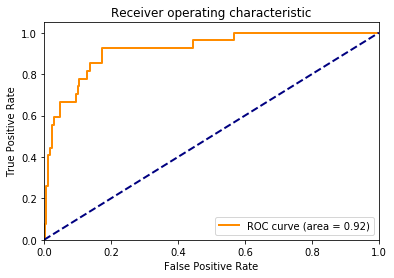

In [29]:
# Compute ROC curve and ROC area for each class



# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Bastante similar al modelo de una capa, esto me hace pensar que la opción "class_weight='balanced'" funciona bastante bien.